<p align="center">
  26 de Novembro de 2021
</p>

<br>
<br>

<p align="center">
  <img height="150" src="https://www.ccs.ufscar.br/imagens/ufscar-preto.png">
</p>

<p align="center">
  <img height="150" src="https://site.dc.ufscar.br/static/media/LOGO-DC.295bfc37.svg">
</p>

---

<h1 align="center">Trabalho de Aprendizado de Máquina 2</h1>


<h3 align="center">Profº. Dr. Diego Furtado Silva</h3>


<p align="center">
  Lucas Machado Cid (769841) <br>
  Victória De Martini de Souza (759378) <br>
  Vinicius Quaresma da Luz (769836)
</p>

---

O código abaixo importa as dependências necessárias para a posterior execução do código. Antes de executar, certifique-se de ter instalado as dependências declaradas no arquivo `requirements.txt`.

# Declaração de PC bom

In [49]:
import os
pc_bom = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')/(1024.**3) > 11

In [50]:
import csv

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score
from skmultilearn.problem_transform import (BinaryRelevance, ClassifierChain,
                                            LabelPowerset)

As funções abaixo atuam como métodos de conveniência, além de servirem para que o código fique bem modularizado.

In [51]:

def get_data(fileName, possible_labels, total_attributes, limit_instances=0):

  # Abre o arquivo
  file = open('datasets/' + fileName)
  csvreader = csv.reader(file, delimiter =' ')

  data = []

  # Coloca o csv lido em um array
  # O csv tem uma última coluna vazia, por isso a descartamos no processo
  for row in csvreader:
    data.append(row[:-1])

  X = []
  Y = []

  # Pega os dados crus e os divide em atributos e rótulos.
  iteration_limit = len(data) if limit_instances == 0 else limit_instances
  for i in range(iteration_limit):

    # Inicializa o array de atributos para cada elemento
    lx = []
    for j in range(total_attributes):
      lx.append(np.nan)

    # Trata os valores para se encaixar no modelo de dados aceito pelo sklearn
    for j in range(1, len(data[i])):
      attribute = int(data[i][j].split(":")[0]) - 1
      lx[attribute] = float(data[i][j].split(":")[1])

    X.append(lx)

    # Os rótulos obtidos pelo csv estão todos juntos no primeiro atributo, separados por virgula
    # Para cada um dos rótulos possíveis (definido em possible_labels), verifica se o elemento contém ou não cada um dos rótulus
    # e cria novas colunas na tabela com valores 0 ou 1 que indicam se o elemento tem ou não determinado rótulo
    ly = []
    for j in range(len(possible_labels)):
      ly.append(1 if possible_labels[j] in data[i][0].split(",") else 0)
    Y.append(ly)

  # Para valores ausentes, coloca-se a média dos outros elementos para aquele atributo
  imp = SimpleImputer(missing_values=np.nan, strategy='mean')
  X = imp.fit_transform(X)

  return [X, Y]

In [52]:
def get_metrics(classifier, X_train, X_test, Y_train, Y_test):
    classifier.fit(np.array(X_train), np.array(Y_train))

    pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(Y_test, pred)
    hl = hamming_loss(Y_test, pred)
    precision = precision_score(Y_test, pred, average='macro', zero_division=0)
    recall = recall_score(Y_test, pred, average='macro', zero_division=0)

    return {
        'accuracy': accuracy,
        'hamming_loss': hl,
        'precision': precision,
        'recall': recall
    }

In [53]:
class RunResult:
  algorithm: str
  dataset: str
  accuracy_score: float
  hamming_loss: float
  precision: float
  recall: float

  def __init__(self, algorithm, dataset, accuracy_score, hamming_loss, precision, recall):
    self.algorithm = algorithm
    self.dataset = dataset
    self.accuracy_score = accuracy_score
    self.hamming_loss = hamming_loss
    self.precision = precision
    self.recall = recall
  
  def __str__(self):
    return f'algorithm: {self.algorithm}, dataset: {self.dataset}, accuracy_score: {self.accuracy_score}, hamming_loss: {self.hamming_loss}, precision: {self.precision}, recall: {self.recall}'
  

results = [] 

Os classificadores que serão utilizados com cada um dos 3 algoritmos selecionados são armazenados na lista abaixo para uso posterior.

In [54]:
classifiers = [{"name": "Classifier Chain", "model": ClassifierChain(RandomForestClassifier())}, 
               {"name": "Binary Relevance", "model": BinaryRelevance(RandomForestClassifier())}, 
               {"name": "Label Powerset", "model": LabelPowerset(RandomForestClassifier())}]

In [55]:
def execute(dataset: str, X_train, X_test, Y_train, Y_test):
  for classifier in classifiers:
    result = get_metrics(classifier['model'], X_train, X_test, Y_train, Y_test)

    results.append(RunResult(dataset, classifier['name'], result['accuracy'], result['hamming_loss'], result['precision'], result['recall']))

## Dataset Yeast


---
O dataset yeast é um conjunto de dados de leveduras(fermentos) que consiste em uma interação proteína-proteína. Os métodos de detecção de interação levaram à descoberta de milhares de interações entre proteínas, e ajudam fomentar a relevância em conjuntos de dados de grandes escala para a biologia atual.

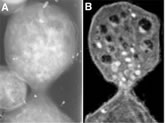


In [56]:
# Dataset Yeast
possible_labels = []
total_attributes = 103

for i in range(15):
  possible_labels.append(str(i))

X_train, Y_train = get_data('yeast/yeast_train', possible_labels, total_attributes)
X_test, Y_test = get_data('yeast/yeast_test', possible_labels, total_attributes)

execute('yeast', X_train, X_test, Y_train, Y_test)

# Scene

In [57]:
possible_labels = ['0', '1', '2', '3', '4', '5']

X_test, Y_test = get_data('scene/scene_test', possible_labels, 294)
X_train, Y_train = get_data('scene/scene_train', possible_labels, 294)

execute('scene', X_train, X_test, Y_train, Y_test)


# TMC 2007

In [58]:
if pc_bom:
    possible_labels = []

    for i in range(101):
        possible_labels.append(str(i))

    X_test, Y_test = get_data('tmc2007/tmc2007_test', possible_labels, 47152, limit_instances=1000)
    X_train, Y_train = get_data('tmc2007/tmc2007_train', possible_labels, 47152, limit_instances=5000)


    execute('tmc2007', X_train, X_test, Y_train, Y_test)

# Emotions

In [60]:
# Dataset emotions
possible_labels = ["amazed-suprised", "happy-pleased", "relaxing-calm", 
                    "quiet-still", "sad-lonely", "angry-aggresive"]
total_attributes = 73

X_test, Y_test = get_data("emotions/emotions_test", possible_labels, total_attributes)
X_train, Y_train = get_data("emotions/emotions_train", possible_labels, total_attributes)

execute('emotions', X_train, X_test, Y_train, Y_test)

# Mediamill

In [63]:
# Dataset mediamill
possible_labels = []
total_attributes = 120

for i in range(101):
  possible_labels.append(str(i))

X_train, Y_train = get_data("mediamill/mediamill_train", possible_labels, total_attributes, limit_instances=500)
X_test, Y_test = get_data("mediamill/mediamill_test", possible_labels, total_attributes, limit_instances=100)

execute('mediamill', X_train, X_test, Y_train, Y_test)

In [64]:
for i in results:
    print(i)

algorithm: yeast, dataset: Classifier Chain, accuracy_score: 0.21046892039258452, hamming_loss: 0.1811704834605598, precision: 0.5817544896157092, recall: 0.31851450719047825
algorithm: yeast, dataset: Binary Relevance, accuracy_score: 0.17557251908396945, hamming_loss: 0.18087968011632133, precision: 0.6384219292470527, recall: 0.2965350658456567
algorithm: yeast, dataset: Label Powerset, accuracy_score: 0.2737186477644493, hamming_loss: 0.19272991639403853, precision: 0.5160654662814264, recall: 0.3677294874353405
algorithm: scene, dataset: Classifier Chain, accuracy_score: 0.5560200668896321, hamming_loss: 0.08904682274247491, precision: 0.8899545255491539, recall: 0.5783652917873551
algorithm: scene, dataset: Binary Relevance, accuracy_score: 0.5317725752508361, hamming_loss: 0.09044035674470458, precision: 0.8947108497302075, recall: 0.5656486252410441
algorithm: scene, dataset: Label Powerset, accuracy_score: 0.7207357859531772, hamming_loss: 0.08291527313266443, precision: 0.795